<a href="https://colab.research.google.com/github/AnthonyJFeola/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import numpy as np
import pandas as pd

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
def myfunc (my_list):
  total = sum(my_list)
  mean_list = total/len(my_list)
  for element in my_list:
    distances = list(map(lambda element: element - mean_list, my_list))
    squared_distances = list(map(lambda element: element**2, distances))
    list_length=len(squared_distances)-1
    variance_list = sum(squared_distances)/list_length
  print('Mean: {:.2f}'.format(mean_list))
  print('Variance: {:.2f}'.format(variance_list))
  print('Standard Deviation: {:.2f}'.format((variance_list)**(1/2)))

In [247]:
myfunc(sales)

Mean: 3052.71
Variance: 214387.90
Standard Deviation: 463.02


In [248]:
print('Mean: {:.2f}'.format(np.mean(sales)))

Mean: 3052.71


In [249]:
print('Variance: {:.2f}'.format(np.var(sales, ddof=1)))

Variance: 214387.90


In [250]:
print('Standard Deviation: {:.2f}'.format(np.std(sales, ddof=1)))

Standard Deviation: 463.02


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]

In [252]:
print('Covariance: {:.2f}'.format(np.cov(sales, customers)[0][1]))

Covariance: 7604.36


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [253]:
sales_std = np.std(sales, ddof=1)
customer_std = np.std(customers, ddof=1)
print(sales_std)
print(customer_std)

463.0204150595357
17.057326313123664


In [0]:
df = pd.DataFrame({'sales': sales})
df['customers'] = pd.Series(customers)

In [255]:
std_s = df['sales'].std(ddof=1)
std_c = df['customers'].std(ddof=1)
print(std_s)
print(std_c)

463.0204150595357
17.057326313123664


In [256]:
cov_s_c = df['sales'].cov(df['customers'])
print('{:.4f}'.format(cov_s_c))

7604.3571


In [0]:
denominator = std_s*std_c

In [258]:
corr_s_c = cov_s_c/denominator
print('{:.6f}'.format(corr_s_c))

0.962834


In [259]:
print('{:.6f}'.format(df['sales'].corr(df['customers'])))

0.962834


In [260]:
df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [261]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic_df.drop(columns='Unnamed: 0', inplace=True)
titanic_df.drop(columns='body', inplace=True)
titanic_df = titanic_df.select_dtypes(include='number')
titanic_df.head()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,211.3375,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,1


In [262]:
titanic_df.cov()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,10.976961
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,0.174613


In [263]:
titanic_df.corr()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,0.507253
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
vector_a = [9, 3]
vector_b = [-2, 6]

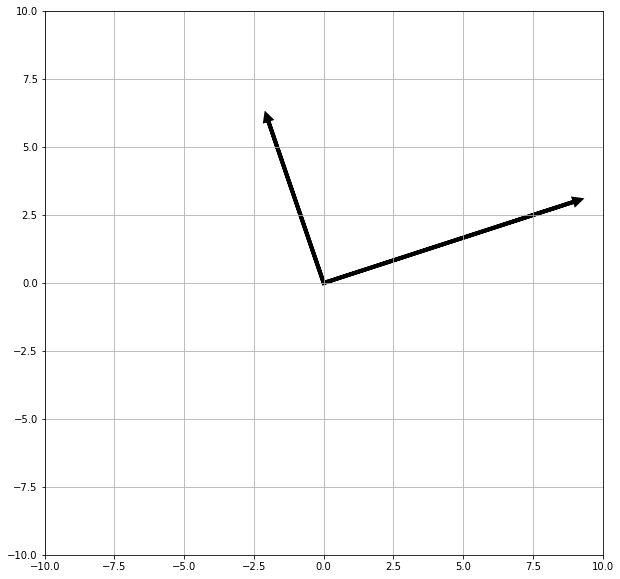

0

In [265]:
fig, ax = plt.subplots(figsize=(10,10))
ax.grid()
plt.xlim(-10,10)          
plt.ylim(-10,10)

for vect in [vector_a, vector_b]:
    plt.arrow(0,0, vect[0], vect[1], head_width=.2, head_length=0.2, linewidth=4)
plt.show()
np.dot(vector_a, vector_b)

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
# No, the dot product is not zero, and they are not at a 90 degree angle.
a = np.array([-5,3,7])
b = np.array([6,-8,2])

In [267]:
np.dot(a,b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2,-15,6,20])

In [269]:
(np.linalg.norm(c))**2

665.0

In [270]:
np.dot(c,c)

665

In [271]:
np.matmul(c.T, c)

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

In [0]:
d = np.array([7, 12])

In [291]:
d_hat = d/np.linalg.norm(d)
print(d_hat)

[0.50387103 0.8637789 ]


$\hat{d} = 0.50\hat{i} + 0.86\hat{\jmath}$


In [0]:
e = np.array([2,11,-8])

In [293]:
e_hat = e/np.linalg.norm(e)
print(e_hat)

[ 0.14547859  0.80013226 -0.58191437]


$\hat{e} = 0.15\hat{i} + 0.80\hat{\jmath}$ - 0.58\hat{e}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = [4,12,11,9,2]

In [273]:
f_hat = f/np.linalg.norm(f)
print(f_hat)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


In [274]:
len(f_hat)

5

In [275]:
f_hat_norm = np.linalg.norm(f_hat)
print('{:.4f}'.format(f_hat_norm))

1.0000


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# Let's take two vectors.
vector_1 = np.array([1,2])
vector_2 = np.array([4,8])

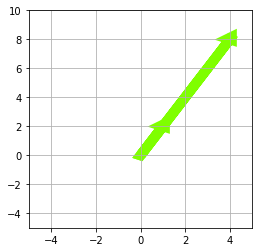

In [288]:
# Plot them on a grid
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,5)          
plt.ylim(-5,10)

# Display
for myvect in [vector_1, vector_2]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=10, 
              color='chartreuse')

In [286]:
# This is one possible linear combination:
a,b=(2,3)
linear_combo= np.multiply(vector_1, a) + np.multiply(vector_2, b) 
print(linear_combo)

[14 28]


In [287]:
# This is a set of several linear combinations:
muchos_combos=[]
for (a,b) in [(2,3), (4,5), (6,7), (8,9)]:
    linear_combo = np.multiply(vector_1, a) + np.multiply(vector_2, b) 
    muchos_combos.append(linear_combo)
print(muchos_combos)

[array([14, 28]), array([24, 48]), array([34, 68]), array([44, 88])]


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



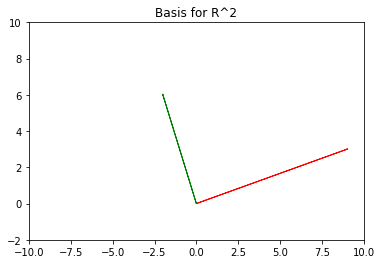

In [276]:
# find basis vectors in 2-d
vector_1 = [9, 3]
vector_2 = [-2, 6]

plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-10,10)          
plt.ylim(-2,10)
plt.title("Basis for R^2")
plt.show()

## 6.2 What does it mean to form a basis?

In 2-dimensional space R2, a vector (a,b) can be decomposed as the linear combination of the basis vectors (1,0) and (0,1)

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [277]:
P = np.array([[1,2,3],[-1,0,7],[4,8,2]])
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is defined as the maximum number of linearly independent column vectors in the matrix or the maximum number of linearly independent row vectors in the matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
v = np.array([1,3])
w = np.array([-1,2])

In [0]:
# dot product
w_dot_v = np.dot(v, w)
v_dot_v = np.dot(v, v)

In [280]:
# projection
fraction = w_dot_v/v_dot_v
projection = np.multiply(fraction,v)
print(projection)

[0.5 1.5]


In [0]:
# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


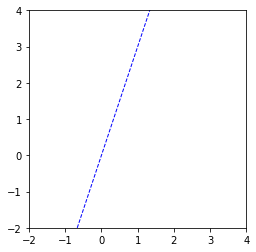

In [282]:
# Axis Bounds
plt.xlim(-2,4)          
plt.ylim(-2,4)

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

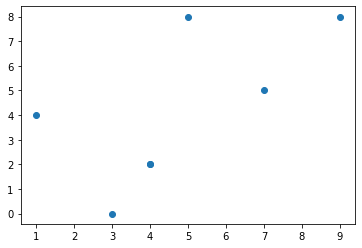

In [283]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()